# BMI Data

## Reference

In [38]:
# https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/bmi.csv

## Import Libraries

In [77]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report, RocCurveDisplay

## import Data 

In [40]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/bmi.csv'
bmi = pd.read_csv(path)
bmi.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [41]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


## split the variables and Target

In [42]:
X = bmi[['Gender', 'Height', 'Weight']]
y = bmi['Index']

## Gradient Boosting

In [56]:
# convert string to float, gredient boosting need to do that
o_c = X.select_dtypes(object).columns
X[o_c] = X.select_dtypes(object).apply(LabelEncoder().fit_transform)

# X['Gender'].replace(['female','male'], [1,0])

### split the data into train and test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Fit the model

In [58]:
model = GradientBoostingClassifier(loss = 'deviance', n_estimators = 500, criterion = 'squared_error', max_depth = 4)

model.fit(X_train, y_train)

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(criterion='squared_error', loss='deviance',
                           max_depth=4, n_estimators=500)

### predict the results

In [59]:
y_pred = model.predict(X_test)

array([5, 3, 2, 4, 5, 3, 1, 5, 0, 3, 5, 2, 4, 5, 5, 5, 5, 1, 5, 5, 5, 5,
       4, 5, 5, 3, 4, 2, 1, 4, 0, 5, 5, 5, 5, 3, 4, 4, 3, 5, 2, 3, 5, 2,
       2, 4, 5, 3, 5, 3, 2, 4, 3, 2, 5, 5, 5, 5, 3, 4, 5, 5, 5, 4, 5, 4,
       5, 4, 4, 2, 5, 5, 5, 4, 5, 2, 4, 2, 1, 4, 3, 2, 5, 4, 0, 0, 5, 3,
       5, 3, 4, 4, 3, 4, 2, 4, 2, 3, 5, 5, 4, 2, 3, 5, 2, 5, 5, 5, 4, 5,
       4, 4, 1, 5, 3, 5, 2, 5, 4, 4, 5, 5, 3, 4, 5, 1, 5, 5, 4, 4, 5, 5,
       5, 4, 2, 5, 5, 5, 5, 2, 2, 3, 4, 5, 5, 5, 5, 4, 5, 1], dtype=int64)

### Confusion metrics

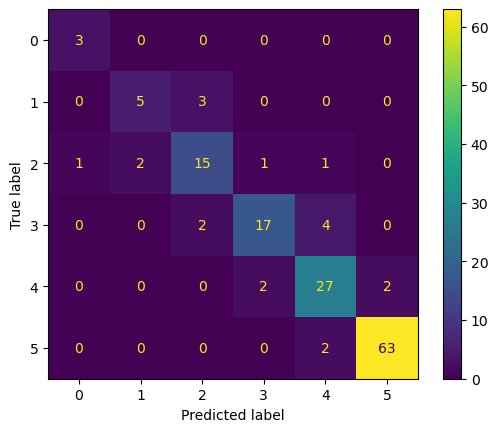

In [67]:
cm = confusion_matrix(y_test, y_pred)
dis = ConfusionMatrixDisplay(cm)
dis.plot()
plt.show()

### calculate the accuracy

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.71      0.62      0.67         8
           2       0.75      0.75      0.75        20
           3       0.85      0.74      0.79        23
           4       0.79      0.87      0.83        31
           5       0.97      0.97      0.97        65

    accuracy                           0.87       150
   macro avg       0.80      0.83      0.81       150
weighted avg       0.87      0.87      0.87       150

